# **WFLOW: PRODUCTS RELATED TO DIGITAL ELEVATION MODEL**

## *PACKAGES*


In [31]:
include(raw"d:\JOE\MAIN\MODELS\WFLOW\WflowDataJoe\WflowRaster.jl\src\GeoRaster.jl")
include(raw"d:\JOE\MAIN\MODELS\WFLOW\WflowDataJoe\WflowRaster.jl\src\Parameters.jl")

using Rasters, Shapefile, GeoTIFF, ArchGDAL, GeoFormatTypes, GeoArrays, Extents
using Geomorphometry
using CairoMakie, GLMakie

CairoMakie.activate!()


## **DEM OFFICIAL GRID SIZE**

	https://rafaqz.github.io/Rasters.jl/dev/api#Rasters.resample-Tuple
method: A Symbol or String specifying the method to use for resampling. From the docs for gdalwarp:

**:near:** nearest neighbour resampling (default, fastest algorithm, worst interpolation quality).
:bilinear: bilinear resampling.
:cubic: cubic resampling.
:cubicspline: cubic spline resampling.
:lanczos: Lanczos windowed sinc resampling.
:average: average resampling, computes the weighted average of all non-NODATA contributing pixels. rms root mean square / quadratic mean of all non-NODATA contributing pixels (GDAL >= 3.3)
:mode: mode resampling, selects the value which appears most often of all the sampled points.
:max: maximum resampling, selects the maximum value from all non-NODATA contributing pixels.
:min: minimum resampling, selects the minimum value from all non-NODATA contributing pixels.
:med: median resampling, selects the median value of all non-NODATA contributing pixels.
:q1: first quartile resampling, selects the first quartile value of all non-NODATA contributing pixels.
:q3: third quartile resampling, selects the third quartile value of all non-NODATA contributing pixels.
:sum: compute the weighted sum of all non-NODATA contributing pixels (since GDAL 3.1)

## **DEM OPERATIONS**

In [9]:

# Reading data
   Path_InputGis_Dem    = joinpath(Path_Root, Path_InputGis, Dem_Input)
   Dem_Raw              = Rasters.Raster(Path_InputGis_Dem)

   # Resample Dem in 2 steps
	Crs_GeoFormat = GeoFormatTypes.convert(WellKnownText, EPSG(Crs))

	Dem_Resample₀ = Rasters.replace_missing(Dem_Raw, missingval=NaN)

	Dem_Resample₁ = Rasters.resample(Dem_Resample₀; res=ΔX₁, method=ResampleMethod₁, crs=Crs_GeoFormat)

	Dem_Resample = Rasters.resample(Dem_Resample₁; res=ΔX₂, method=ResampleMethod₂, crs=Crs_GeoFormat)

   # Writting the output
   Path_OutputJulia_Dem = joinpath(Path_Root, Path_OutputJulia, Dem_Julia)
   Rasters.write(Path_OutputJulia_Dem, Dem_Resample; ext=".tiff", missingval= NaN, force=true, verbose=true)

# Getting the metadata
	Metadatas = geoRaster.RASTER_METADATA(Path_OutputJulia_Dem; Verbose=false);

# # Dem_Resample = Rasters.aggregate(locus=Rasters.Center(), Dem_Raw, (Y(ΔX), X(ΔX)); skipmissingval=true)



Main.geoRaster.METADATA(921, 571, 5, 5, 143100.001, 147700.001, 42625.008, 39775.008, 29902, WellKnownText{GeoFormatTypes.CRS}(GeoFormatTypes.CRS(), "PROJCS[\"TM65 / Irish Grid\",GEOGCS[\"TM65\",DATUM[\"TM65\",SPHEROID[\"Airy Modified 1849\",6377340.189,299.3249646,AUTHORITY[\"EPSG\",\"7002\"]],AUTHORITY[\"EPSG\",\"6299\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4299\"]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",53.5],PARAMETER[\"central_meridian\",-8],PARAMETER[\"scale_factor\",1.000035],PARAMETER[\"false_easting\",200000],PARAMETER[\"false_northing\",250000],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH],AUTHORITY[\"EPSG\",\"29902\"]]"), 1, Extent(X = (143100.001, 147700.001), Y = (39775.008, 42625.008)))

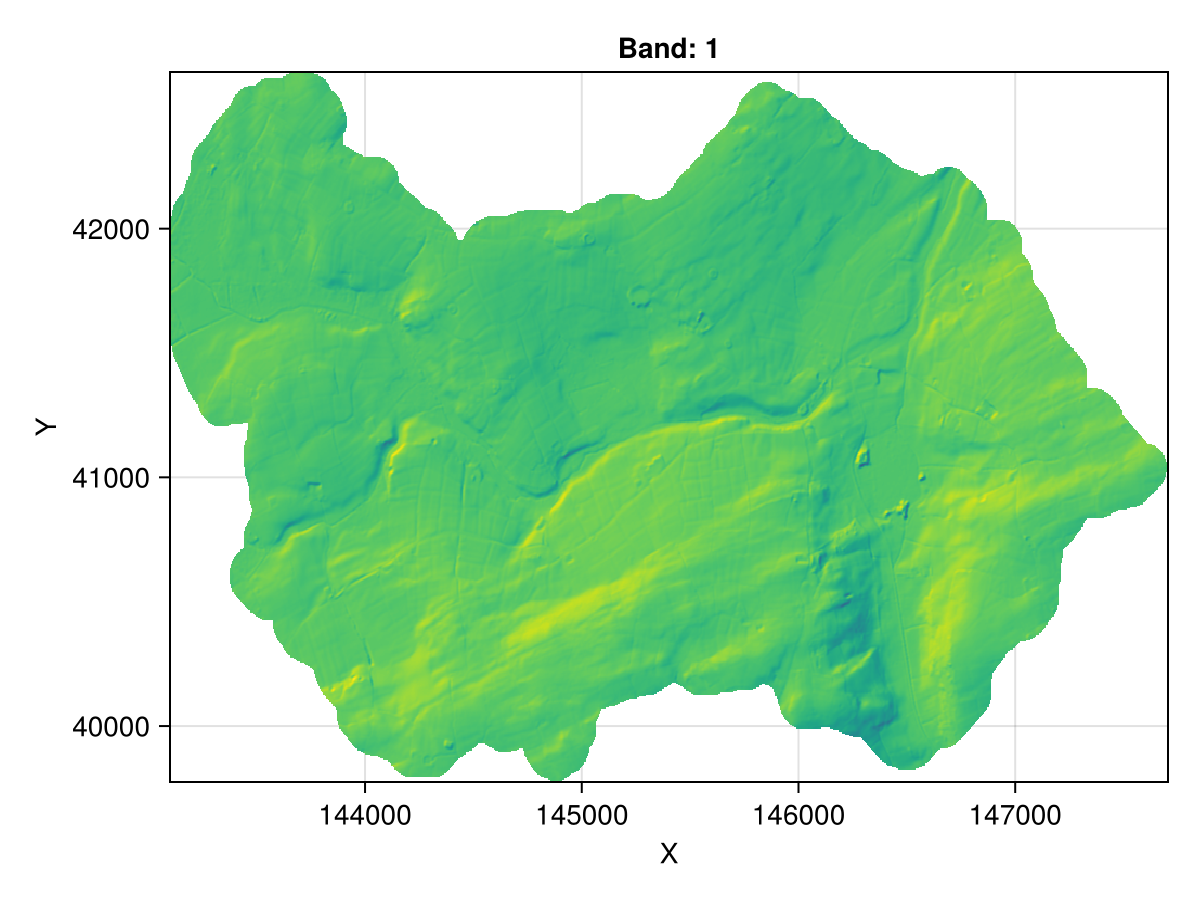

In [10]:
using CairoMakie, GLMakie
if Flag_Plots
   Makie.plot(hillshade(Dem_Resample))
end


## ====== **PLEASE RUN PYTHON CODE** =======

++===========================================++


## **CATCHMENT:** *Reading catchment boundary from Python used as a mask*

In [ ]:
Path_InputPython_Subcatchment = joinpath(Path_Root, Path_OutputPython, Subcatch_Python)
Subcatchment₀ = Rasters.Raster(Path_InputPython_Subcatchment)

# Assuring that it has the same grid size as the Dem_Resample
Subcatchment = Rasters.resample(Subcatchment₀; to=Dem_Resample, missingval= NaN)

# Writting the output
Path_OutputWflow_Subcatchment = joinpath(Path_Root, Path_OutputWflow, Subcatch_Wflow)
Rasters.write(Path_OutputWflow_Subcatchment, Subcatchment; ext=".tiff", missingval= NaN, force=true, verbose=true)


"d:\\JOE\\MAIN\\MODELS\\WFLOW\\DATA\\Timoleague\\OutputWflow\\wflow_subcatch.tiff"

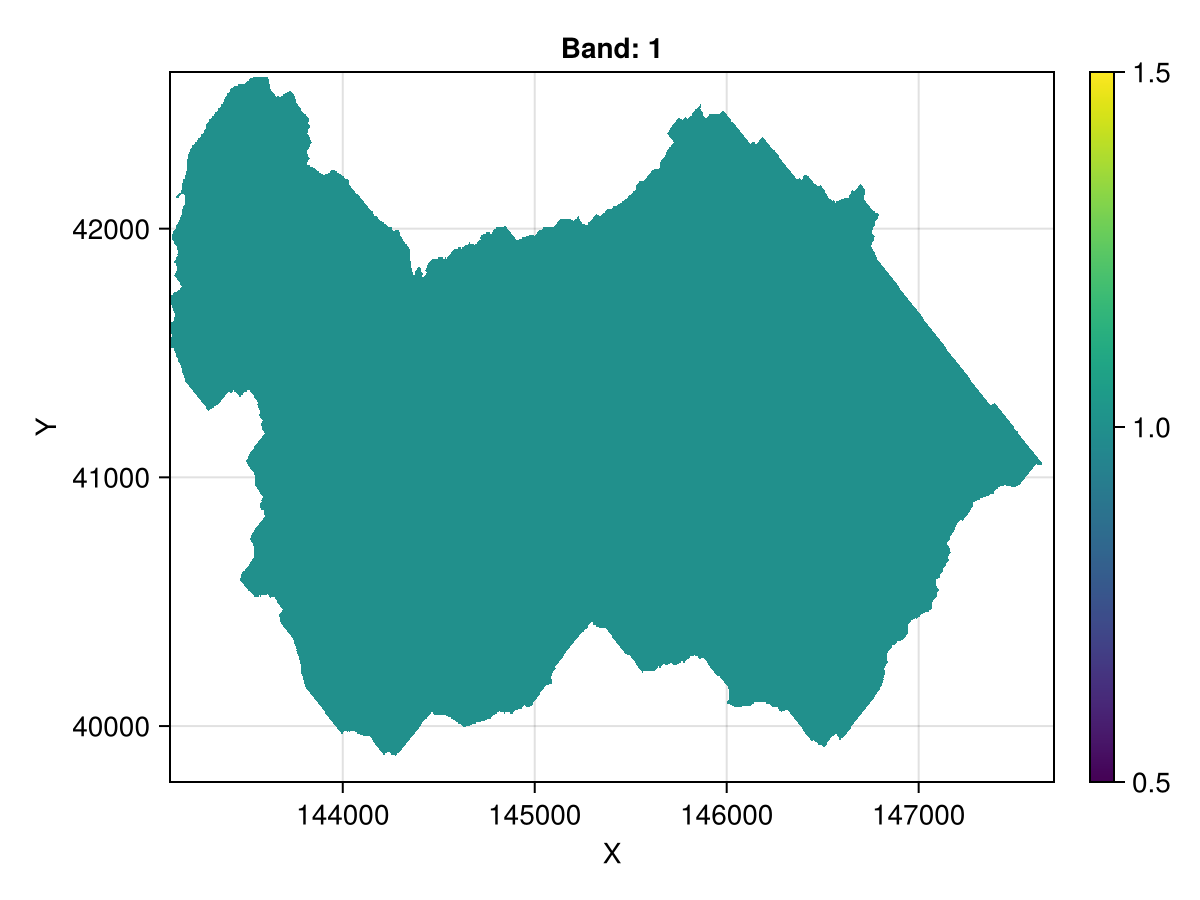

In [12]:
if Flag_Plots
   Makie.plot(Subcatchment)
end


## **DEM:** *Mask to catchment area*

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputJulia\Timoleague_DEM_Mask.tif
Bands = 1
Crs = 29902
ΔX = 5.0
ΔY = 5.0
N_Width  = 921
N_Height = 571
Coord_X_Left = 143100.001, Coord_X_Right = 147700.001
Coord_Y_Top = 42625.008, Coord_Y_Bottom = 39775.008


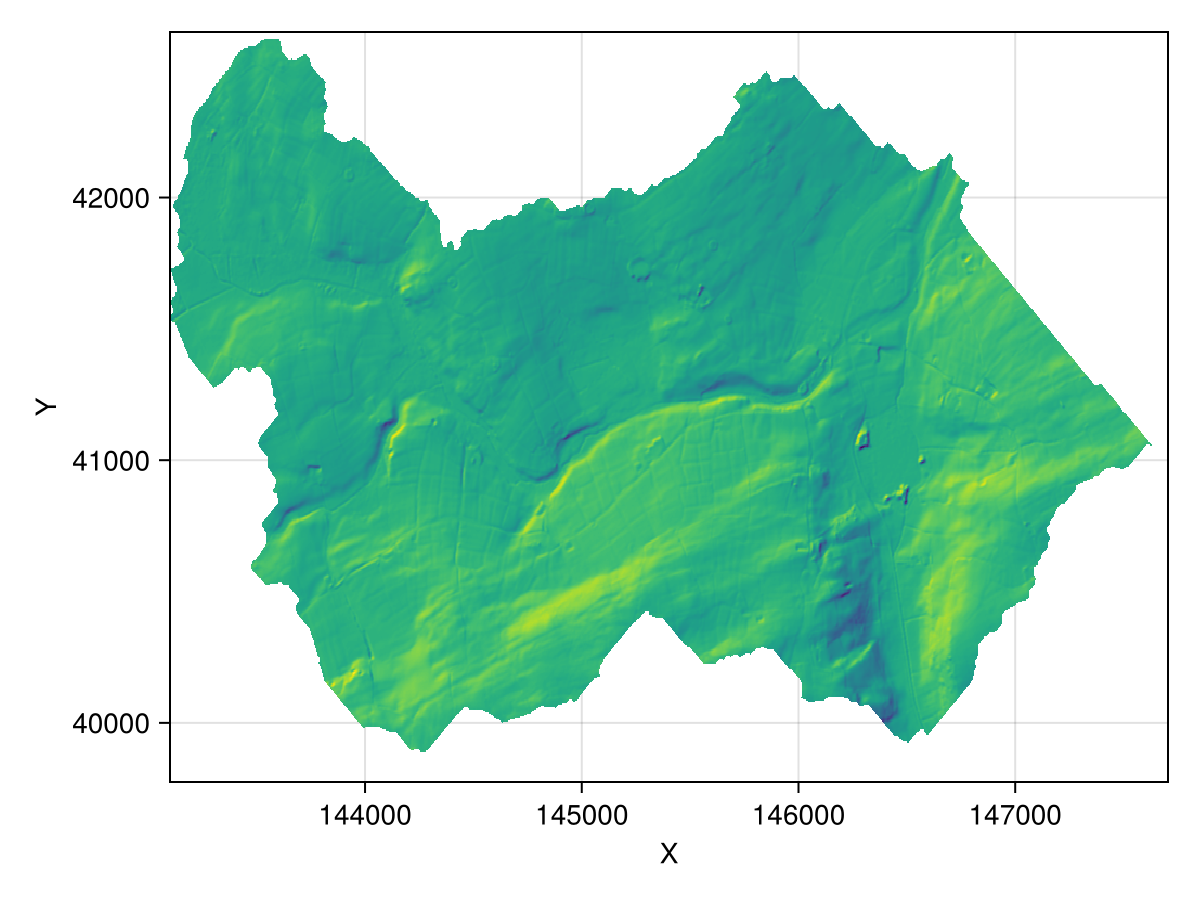

In [21]:
Dem_Resample_Mask = Rasters.mask(Dem_Resample; with=Subcatchment, missingval=NaN)

# Writting the output
Path_OutputJulia_DemMask = joinpath(Path_Root, Path_OutputJulia, Dem_Julia_Mask)
Rasters.write(Path_OutputJulia_DemMask, Dem_Resample_Mask; ext=".tiff", missingval= NaN, force=true, verbose=true)

# Getting the metadata
	Metadatas = geoRaster.RASTER_METADATA(Path_OutputJulia_DemMask; Verbose=true);

if Flag_Plots
   Makie.plot(hillshade(Dem_Resample_Mask))
end


## **LDD:** *Mask to catchment area* 

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputWflow\wflow_ldd.tiff


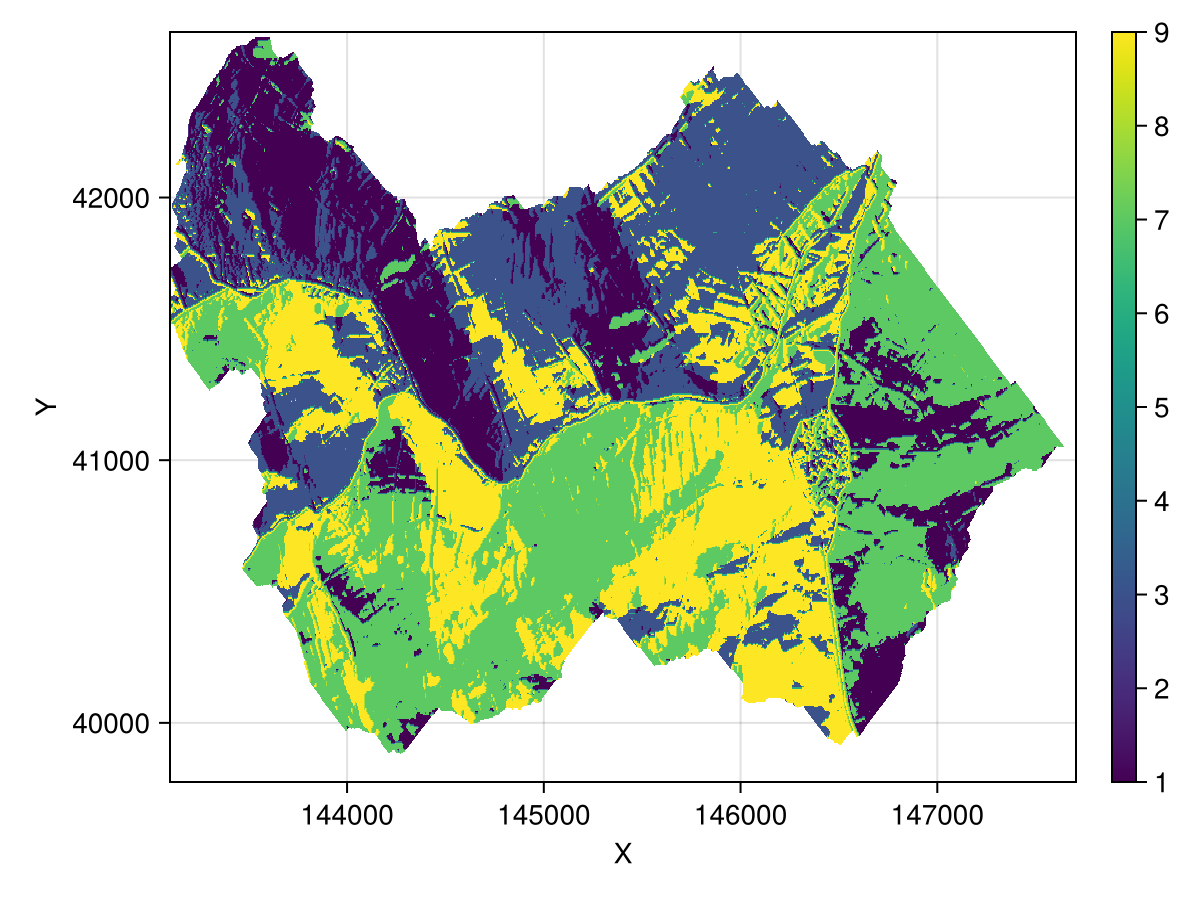

In [16]:
Path_InputPython_Ldd = joinpath(Path_Root, Path_OutputPython, Ldd_Python)
Ldd₀ = Rasters.Raster(Path_InputPython_Ldd)

# Assuring that it has the same grid size as the Dem_Resample
Ldd₁ = Rasters.resample(Ldd₀; to=Dem_Resample_Mask)

Ldd_Mask = Rasters.mask(Ldd₁; with=Subcatchment, missingval=0)

# Writting the output
Path_OutputWflow_LddMask = joinpath(Path_Root, Path_OutputWflow, Ldd_Wflow)
println(Path_OutputWflow_LddMask)
Rasters.write(Path_OutputWflow_LddMask, Ldd_Mask; ext=".tiff", missingval=NaN, force=true, verbose=true)

if Flag_Plots
   Makie.plot(Ldd_Mask)
end


## **OUTLETS STATION**

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\InputGis\Timoleague_Outlet_Hydro.shp


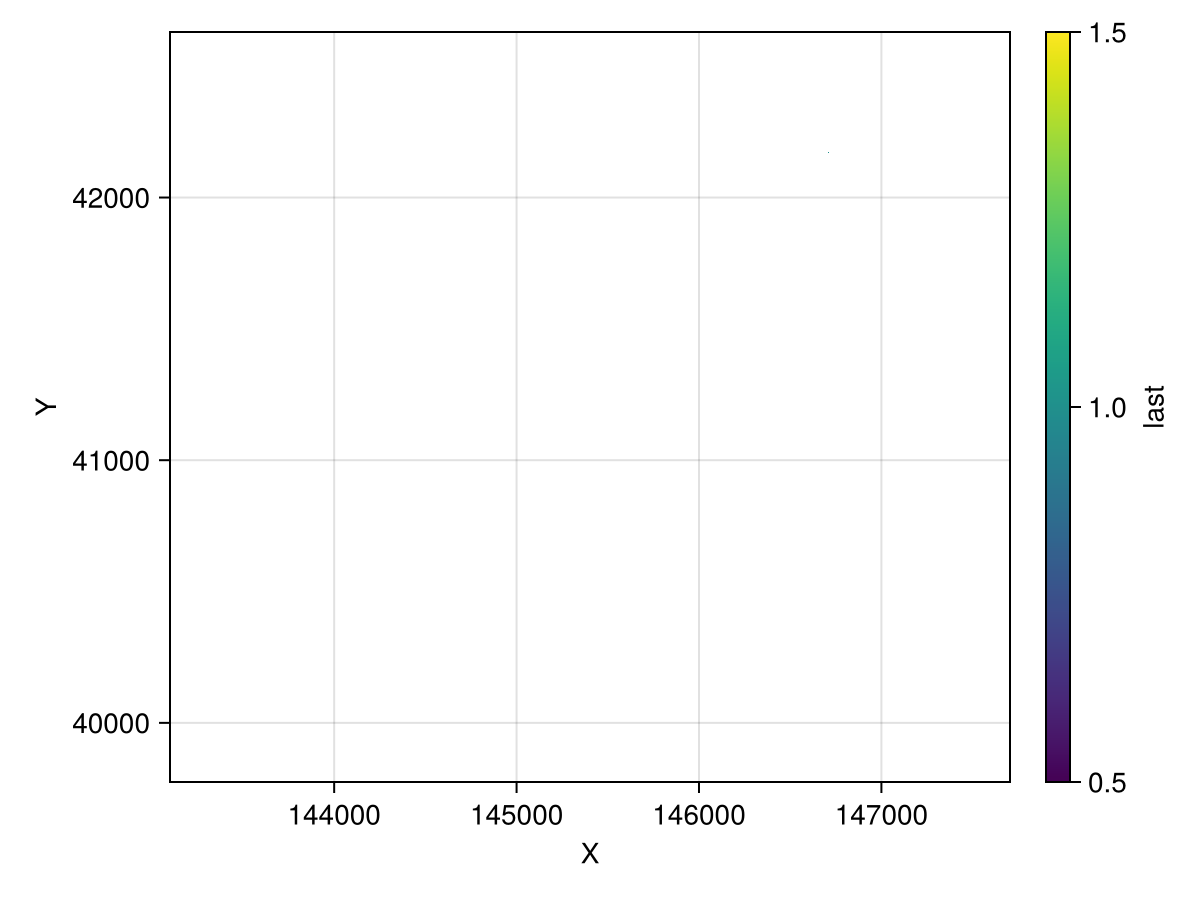

In [22]:

Path_InputGis_Outlet  = joinpath(Path_Root, Path_InputGis, Outlet_Input)
println(Path_InputGis_Outlet)

# Load the shapefile
Outlet_Raw = Shapefile.Handle(Path_InputGis_Outlet)

Outlet = Rasters.rasterize(last, Outlet_Raw; res=ΔX₂, fill=1, missingval=NaN, crs=Metadatas.Crs_GeoFormat, to=Dem_Resample_Mask, shape=:point ,progress=true)

#TODO: check if the outlet is inside the subcatchment
# Outlet_Mask = Rasters.mask(Outlet; with=Subcatchment, missingval=NaN)

Path_OutputJulia_Outlet = joinpath(Path_Root, Path_OutputJulia, Outlet_Julia)
Rasters.write(Path_OutputJulia_Outlet, Outlet; ext=".tiff", force=true, verbose=true, missingval= NaN)

if Flag_Plots
   CairoMakie.heatmap(Outlet)
end


## **RIVER:** *Mask to catchment area*

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\InputGis\Timoleague_River.shp


Rasterizing... 100%|██████████████████████████████████████████████████| Time: 0:00:00


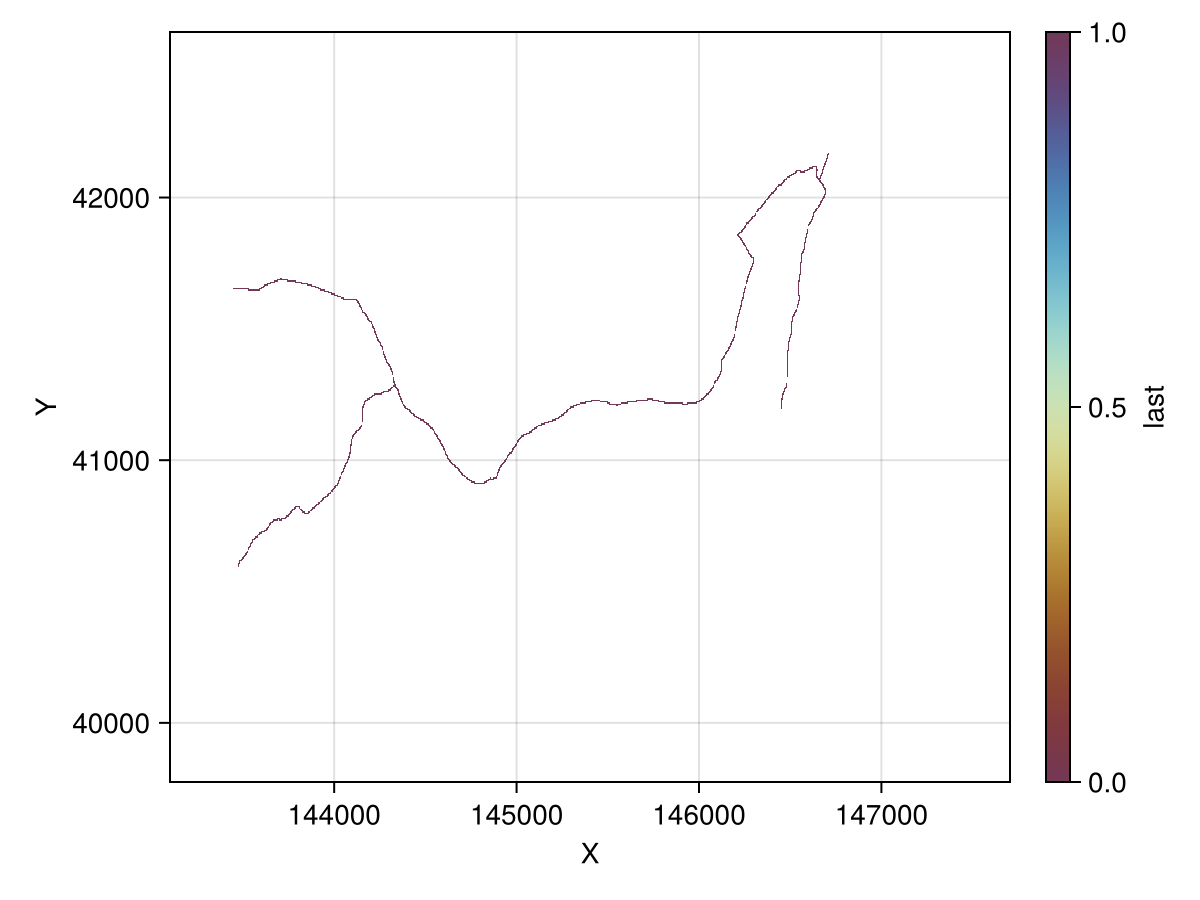

In [23]:

Path_InputGis_River  = joinpath(Path_Root, Path_InputGis, River_Input)
println(Path_InputGis_River)

# Load the shapefile
River_Raw = Shapefile.Handle(Path_InputGis_River)

River = Rasters.rasterize(last, River_Raw; res=ΔX₂, fill=1.0, missingval=NaN, crs=Metadatas.Crs_GeoFormat, to=Dem_Resample_Mask, shape=:line ,progress=true)

River_Mask = Rasters.mask(River; with=Subcatchment, missingval=0)

Path_OutputWflow_River = joinpath(Path_Root, Path_OutputWflow, River_Wflow)
Rasters.write(Path_OutputWflow_River, River_Mask; ext=".tiff", force=true, verbose=true, missingval= 0)

if Flag_Plots
   CairoMakie.heatmap(River_Mask ; colormap=:romaO, colorrange=(0, 1))
end


## **SLOPE:** *Reading Slope from Python & Mask*

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputWflow\RiverSlope.tiff


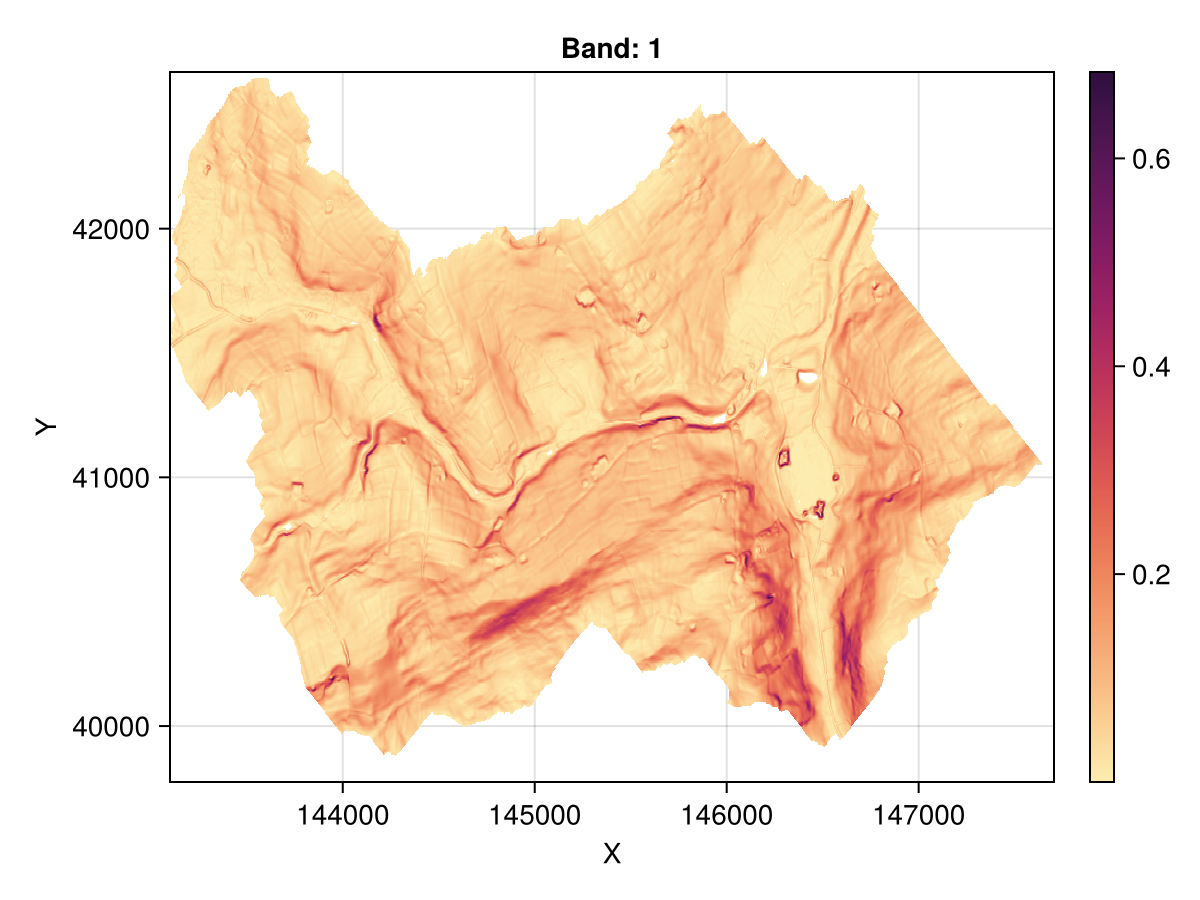

In [26]:

Path_InputPython_Slope = joinpath(Path_Root, Path_OutputPython, Slope_Python)

Slope₀ = Rasters.Raster(Path_InputPython_Slope)

Slope_Mask₀ = Rasters.mask(Slope₀; with=Subcatchment, missingval=NaN);

Slope_Mask = Rasters.resample(Slope_Mask₀; to=Dem_Resample_Mask)

# Writting the output
Path_OutputWflow_Slope = joinpath(Path_Root, Path_OutputWflow, RiverSlope_Wflow)
Rasters.write(Path_OutputWflow_Slope, Slope_Mask; ext=".tiff", missingval= NaN, force=true, verbose=true)
println(Path_OutputWflow_Slope)

if Flag_Plots
   Makie.plot(Slope_Mask; colormap=:matter)
end


## **Rivers slope**

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputWflow\RiverSlope.tiff


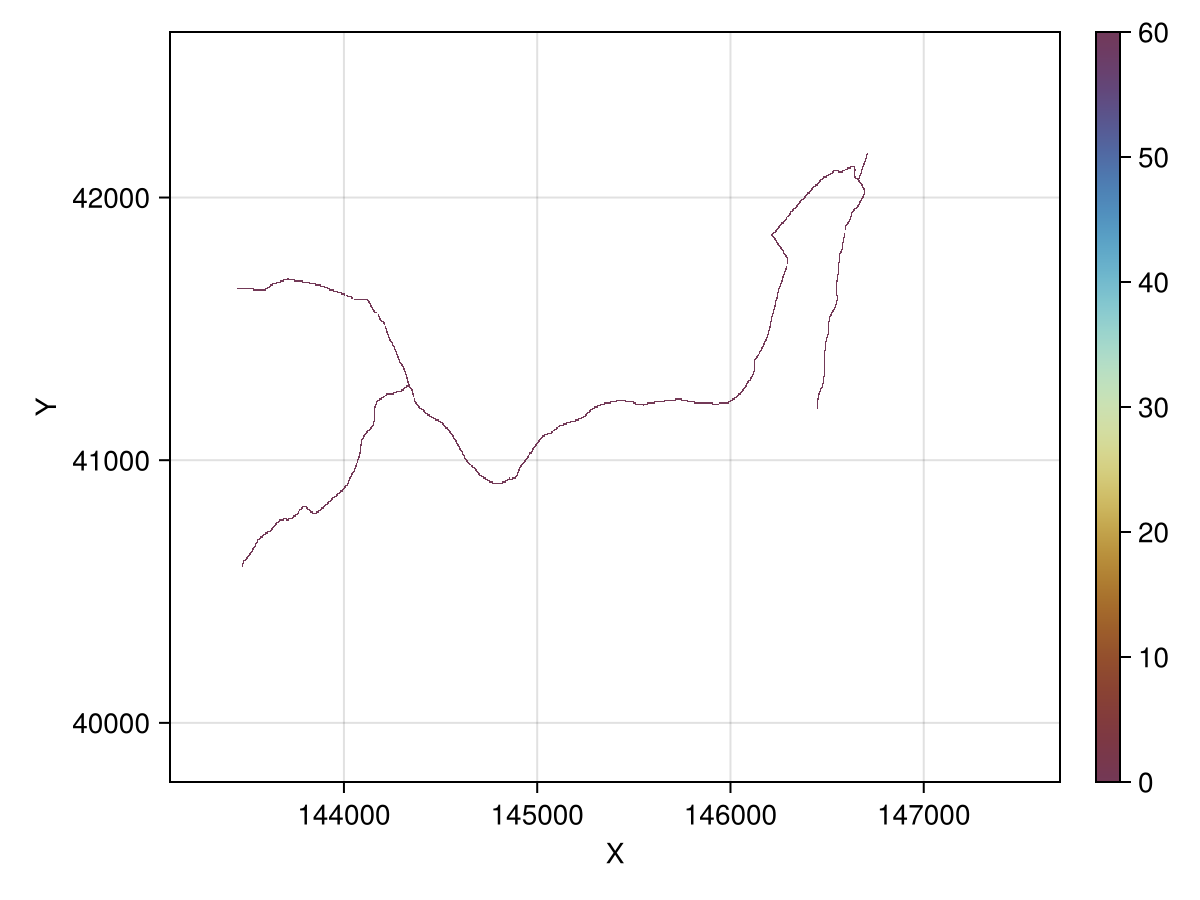

In [ ]:
RiverSlope = Rasters.mask(Slope_Mask; with=River_Mask, missingval=NaN)

# RiverSlope = Float64.(RiverSlope)

Path_OutputWflow_RiverSlope = joinpath(Path_Root, Path_OutputWflow, RiverSlope_Wflow)
Rasters.write(Path_OutputWflow_RiverSlope, RiverSlope; ext=".tiff", force=true, verbose=true, missingval=0)
println(Path_OutputWflow_RiverSlope)

if Flag_Plots
   CairoMakie.heatmap(RiverSlope ; colormap=:romaO, colorrange=(0, 60))
end


## **River width**

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputWflow\wflow_riverwidth.tiff


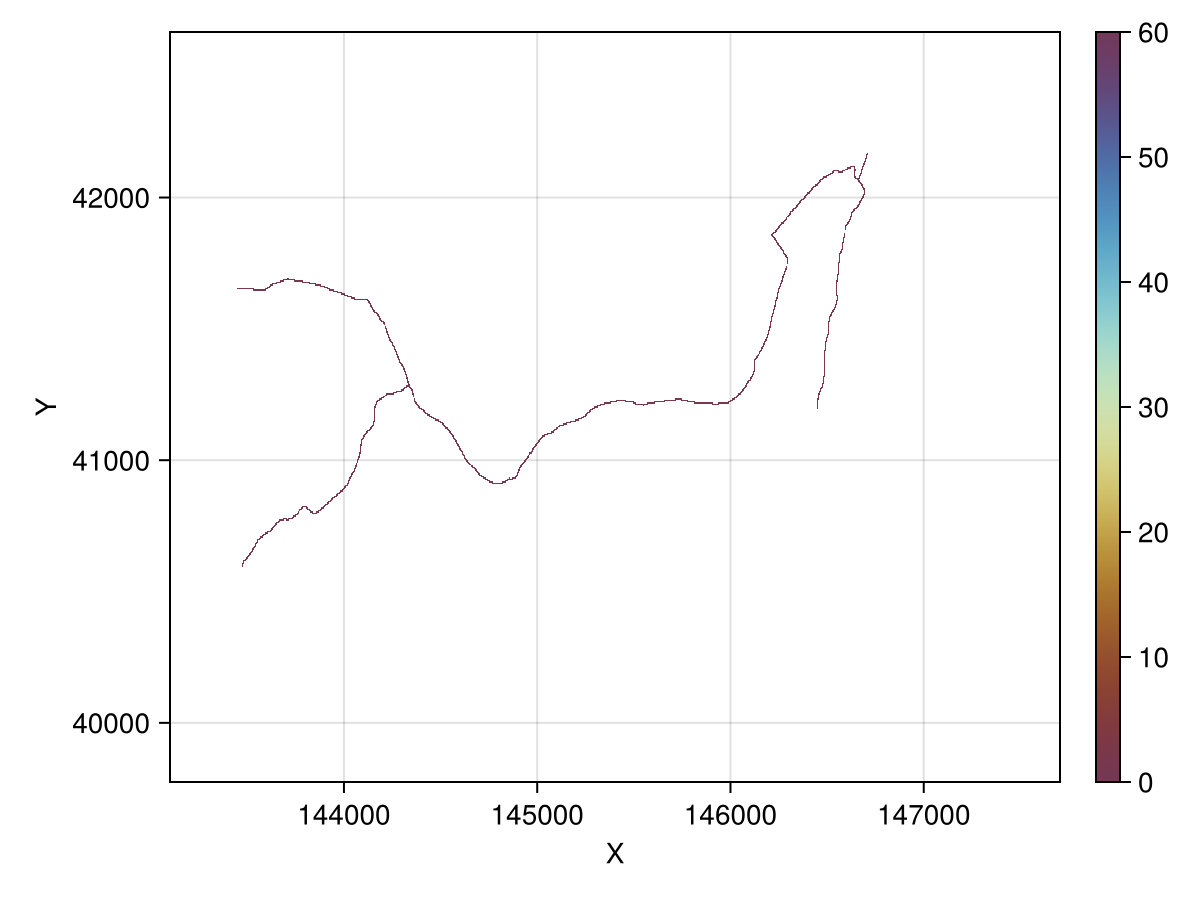

In [32]:

RiverWidth = Float64.(River_Mask) .* P_RiverWidth

Path_OutputWflow_RiverWidth = joinpath(Path_Root, Path_OutputWflow, RiverWidth_Wflow)

Rasters.write(Path_OutputWflow_RiverWidth, RiverWidth; ext=".tiff", force=true, verbose=true, missingval=NaN)

println(Path_OutputWflow_RiverWidth)

if Flag_Plots
   CairoMakie.heatmap(RiverWidth; colormap=:romaO, colorrange=(0, 60))
end


## **River depth**

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputWflow\wflow_riverdepth.tiff


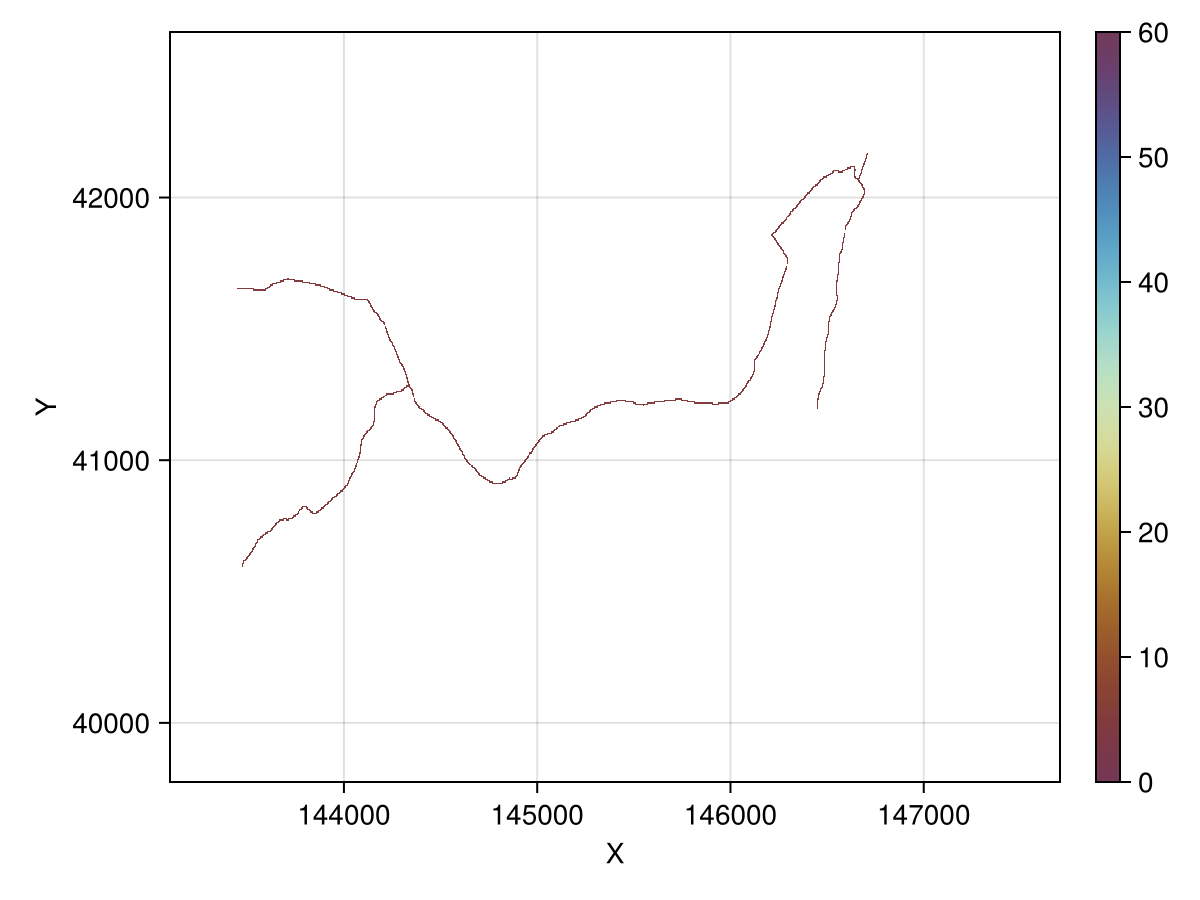

In [33]:
RiverDepth = River_Mask .* P_RiverDepth

Path_OutputWflow_RiverDepth = joinpath(Path_Root, Path_OutputWflow, RiverDepth_Wflow)
println(Path_OutputWflow_RiverDepth)

Rasters.write(Path_OutputWflow_RiverDepth, RiverDepth; ext=".tiff", force=true, verbose=true, missingval=0)

if Flag_Plots
   CairoMakie.heatmap(RiverDepth; colormap=:romaO, colorrange=(0, 60))
end


## **NETCDF**

In [35]:
include(raw"d:\JOE\MAIN\MODELS\WFLOW\WflowDataJoe\WflowRaster.jl\src\GeoRaster.jl")
include(raw"d:\JOE\MAIN\MODELS\WFLOW\WflowDataJoe\WflowRaster.jl\src\Parameters.jl")

NetCDF, Path_NetCDF_Full = geoRaster.TIFF_2_NETCDF(Ldd_Mask, Metadatas, River_Mask, River_Wflow, RiverDepth, RiverDepth_Wflow, RiverSlope, RiverSlope_Wflow, RiverWidth, RiverWidth_Wflow, Slope_Mask, Subcatch_Wflow, Subcatchment);


d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputNetCDF\instates-Timoleague.nc
wflow_ldd
wflow_subcatch
Slope
wflow_river
RiverSlope
wflow_riverwidth
wflow_riverdepth


In [36]:
 using NCDatasets
NetCdf = NCDataset(Path_NetCDF_Full)


Dataset: d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputNetCDF\instates-Timoleague.nc
Group: /

Dimensions
   lon = 921
   lat = 571

Variables
  wflow_ldd   (921 × 571)
    Datatype:    Int64 (Int64)
    Dimensions:  lon × lat
    Attributes:
     units                = 1-9
     comments             = Derived from hydromt.flw.d8_from_dem

  wflow_subcatch   (921 × 571)
    Datatype:    Int64 (Int64)
    Dimensions:  lon × lat
    Attributes:
     units                = 1
     comments             = Derived from hydromt

  Slope   (921 × 571)
    Datatype:    Float64 (Float64)
    Dimensions:  lon × lat
    Attributes:
     units                = -
     comments             = Derived from hydromt

  wflow_river   (921 × 571)
    Datatype:    Int64 (Int64)
    Dimensions:  lon × lat
    Attributes:
     units                = 0/1
     comments             = Derived from hydromt

  RiverSlope   (921 × 571)
    Datatype:    Float64 (Float64)
    Dimensions:  lon × lat
    Attributes:
    

In [37]:
close(NetCdf)


closed Dataset